##### In this Project, we're looking at building a Covolutional AutoEncoder encoding input images into a latent space and decoding them through a decoder


In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D
from keras.models import Model,Sequential
from keras import backend as K
import numpy as np
import keras

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

##### Data Preprocessing

In [2]:
train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

In [3]:
x_train = train_data.flow_from_directory('C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\AUTOENCODERS\\Training\\',
                                         target_size=(64, 64),
                                         batch_size=10,
                                         class_mode='input')

Found 192 images belonging to 1 classes.


In [4]:
x_test = test_data.flow_from_directory('C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\AUTOENCODERS\\Testing\\',
                                       target_size=(64, 64),
                                       batch_size=5,
                                       class_mode='input')

Found 50 images belonging to 1 classes.


##### Building the Convolutional AutoEncoder

##### AutoEncoder Variant 1

In [7]:
#Encoder
model = Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), padding="same",activation="relu", input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPool2D((2,2), padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same",activation="relu"))
model.add(keras.layers.MaxPool2D((2,2), padding='same'))
model.add(keras.layers.Conv2D(16, (3, 3), padding="same",activation="relu"))
model.add(keras.layers.MaxPool2D((2,2), padding='same'))


#Decoder
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D((2,2)))
 
model.add(keras.layers.Conv2D(3, (3,3), activation='sigmoid', padding='same'))


In [8]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 16)         

In [10]:
history = model.fit(x_train, validation_data=x_test, steps_per_epoch=4, epochs=10,  validation_steps=2, shuffle=True)

Epoch 1/10


4/4 [==============================] - 68s 2s/step - loss: 0.1023 - mse: 0.1023 - val_loss: 0.0845 - val_mse: 0.0845
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.0899 - mse: 0.0899 - val_loss: 0.0907 - val_mse: 0.0907
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.0869 - mse: 0.0869 - val_loss: 0.0776 - val_mse: 0.0776
Epoch 4/10
4/4 [==============================] - 3s 786ms/step - loss: 0.0806 - mse: 0.0806 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 5/10
4/4 [==============================] - 3s 849ms/step - loss: 0.0719 - mse: 0.0719 - val_loss: 0.0580 - val_mse: 0.0580
Epoch 6/10
4/4 [==============================] - 3s 893ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0481 - val_mse: 0.0481
Epoch 7/10
4/4 [==============================] - 2s 686ms/step - loss: 0.0502 - mse: 0.0502 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 8/10
4/4 [==============================] - 2s 542ms/step - loss: 0.0473 - mse: 0.0473 - v

In [11]:
model.save('Convolutional-AutoEncoder1.h5')

c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### AutoEncoder Test 2

In [6]:
encoder_input = keras.layers.Input(
shape=(64, 64, 3), name = "encoder_input")
x = keras.layers.Conv2D(32, (3, 3), strides = 2, activation = 'relu',padding="same")(encoder_input)
x = keras.layers.Conv2D(64, (3, 3), strides = 2, activation = 'relu',padding="same")(x)
x = keras.layers.Conv2D(128, (3, 3), strides = 2, activation = 'relu',padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]
x = keras.layers.Flatten()(x)
encoder_output = keras.layers.Dense(2, name="encoder_output")(x)
encoder = keras.models.Model(encoder_input, encoder_output)


In [7]:
decoder_input = keras.layers.Input(shape=(2,), name="decoder_input")
x = keras.layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = keras.layers.Reshape(shape_before_flattening)(x)
x = keras.layers.Conv2DTranspose(128, (3, 3), strides=2, activation = 'relu', padding="same")(x)
x = keras.layers.Conv2DTranspose(64, (3, 3), strides=2, activation = 'relu', padding="same")(x)
x = keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation = 'relu', padding="same")(x)
decoder_output = keras.layers.Conv2D(
3,
(3, 3),
strides = 1,
activation="sigmoid",
padding="same",
name="decoder_output"
)(x)
decoder = keras.models.Model(decoder_input, decoder_output)

In [8]:
autoencoder = Model(encoder_input, decoder(encoder_output))

In [9]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [10]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 encoder_output (Dense)      (None, 2)                 16386     
                                                                 
 model_1 (Functional)        (None, 64, 64, 3)         2652

In [12]:
autoencoder.fit(
x_train,
epochs=5,
batch_size=10,
shuffle=True,
validation_data=x_test,
)

Epoch 1/5

20/20 [==============================] - 168s 2s/step - loss: 0.6918 - val_loss: 0.6745
Epoch 2/5
20/20 [==============================] - 5s 238ms/step - loss: 0.6758 - val_loss: 0.6594
Epoch 3/5
20/20 [==============================] - 5s 229ms/step - loss: 0.6493 - val_loss: 0.6495
Epoch 4/5
20/20 [==============================] - 5s 251ms/step - loss: 0.6369 - val_loss: 0.6228
Epoch 5/5
20/20 [==============================] - 5s 243ms/step - loss: 0.6239 - val_loss: 0.6152


20/20 [==============================] - 1s 45ms/step


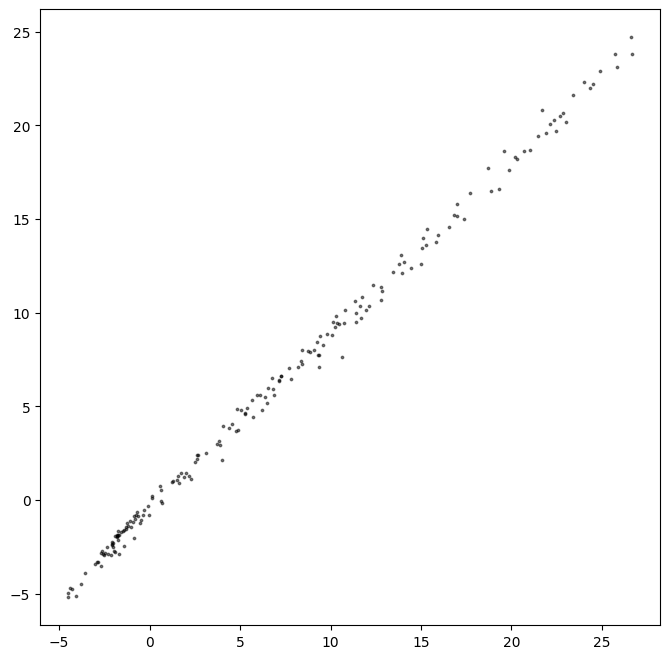

In [16]:
embeddings = encoder.predict(x_train)
plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5,s=3)
plt.show()